In [28]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'matplotlib.finance'

In [34]:
class Planet:
    def __init__(self, name):
        self.name = name
        
m = Planet('mercury')

m.name

'mercury'

             High   Low  Open  Close    Volume  Adj Close    100ma
Date                                                              
2022-12-08  1.450  1.28  1.31   1.32  12824500       1.32  3.46465
2022-12-09  1.355  1.25  1.30   1.30  16065900       1.30  3.42105
2022-12-12  1.475  1.28  1.31   1.45  20003200       1.45  3.37945
2022-12-13  1.750  1.43  1.64   1.53  50029700       1.53  3.34305
2022-12-14  1.610  1.43  1.47   1.52  18632500       1.52  3.30885


ValueError: Invalid frequency: !0D

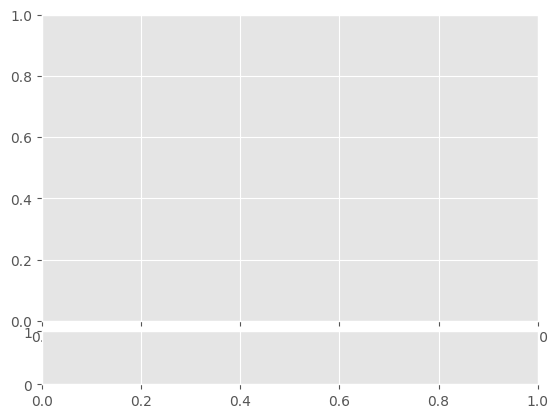

In [27]:
# style.use('ggplot')

# start = dt.datetime(2022, 1,1)
# end = dt.datetime(2022,12,14)

# df = web.DataReader('OPEN', 'yahoo', start, end)
# print(df.tail(6))

# df.to_csv('open.csv')

df = pd.read_csv('open.csv', parse_dates=True, index_col=0 )
# print(df[['Open', 'High']].tail())
# df['Adj Close'].plot()

df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.tail())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

df_ohlc = df['Adj Close'].resample('!0D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.dates2num)

print(df_ohlc.head())

# ax1.plot(df.index, df['Adj Close'])
# ax1.plot(df.index, df['100ma'])
# ax2.plot(df.index, df['Volume'])

ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan= 1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.dates2num, df))

plt.show()